<a href="https://colab.research.google.com/github/oliullah-ju/projects/blob/main/fresh_fruit_vegetables_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import itertools
import shutil
from PIL import Image
# Data Handling libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
from tensorflow.keras.applications.resnet50 import ResNet50
# DeepLearning Tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Activation , Flatten , BatchNormalization , Dropout
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

2024-03-03 10:09:53.210645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 10:09:53.210928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 10:09:53.387407: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
#Start by connecting gdrive into the google colab

#from google.colab import drive

#drive.mount('/content/gdrive')

In [ ]:
dataset = '/kaggle/input/ffv-dataset-2/Fruits_Vegetables_Dataset(12000)'

filepaths = []
labels = []
folds= os.listdir(dataset)

for fold in folds:
    f_path = os.path.join(dataset , fold)

    if not os.path.isdir(f_path): # if not a directory, skip
        continue
    imgs = os.listdir(f_path)

    for img in imgs:
        img_path = os.path.join(f_path , img)
        filepaths.append(img_path)
        labels.append(fold)

Files = pd.Series(filepaths , name= 'filepaths')
labels = pd.Series(labels ,name = 'labels' )
df = pd.concat([Files , labels] , axis = 1)

In [ ]:
df.head()

,filepaths,labels
0,/kaggle/input/ffv-dataset-2/Fruits_Vegetables_...,RottenBanana
1,/kaggle/input/ffv-dataset-2/Fruits_Vegetables_...,RottenBanana
2,/kaggle/input/ffv-dataset-2/Fruits_Vegetables_...,RottenBanana
3,/kaggle/input/ffv-dataset-2/Fruits_Vegetables_...,RottenBanana
4,/kaggle/input/ffv-dataset-2/Fruits_Vegetables_...,RottenBanana


In [ ]:
class_names = df['labels'].unique().tolist()
class_names

['RottenBanana',
 'FreshPotato',
 'RottenTomato',
 'RottenBellpepper',
 'FreshBellpepper',
 'FreshMango',
 'FreshCucumber',
 'FreshTomato',
 'FreshBanana',
 'RottenCarrot',
 'RottenCucumber',
 'FreshStrawberry',
 'RottenApple',
 'RottenStrawberry',
 'FreshOrange',
 'RottenOrange',
 'RottenMango',
 'FreshApple',
 'RottenPotato',
 'FreshCarrot']

In [ ]:
train , dummy = train_test_split(df , train_size = 0.7 , random_state= 42 , shuffle = True)
valid , test = train_test_split(dummy , test_size = 0.5 , random_state = 42 , shuffle= True)

In [ ]:
print(f"The shape of the train data is: {train.shape}")
print(f"The shape of the validation data is: {valid.shape}")
print(f"The shape of the test data is: {test.shape}")

The shape of the train data is: (8400, 2)
The shape of the validation data is: (1800, 2)
The shape of the test data is: (1800, 2)


In [ ]:
img_size = (150,150)
channels = 3
num_batches= 64

tr_gen= ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train, x_col= 'filepaths', y_col= 'labels',target_size= img_size,
                                     class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= num_batches)
valid_gen= ts_gen.flow_from_dataframe(valid, x_col= 'filepaths', y_col= 'labels',target_size= img_size,
                                     class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= num_batches)
test_gen= ts_gen.flow_from_dataframe(test, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False , batch_size= num_batches)

Found 8390 validated image filenames belonging to 20 classes.
Found 1798 validated image filenames belonging to 20 classes.
Found 1798 validated image filenames belonging to 20 classes.


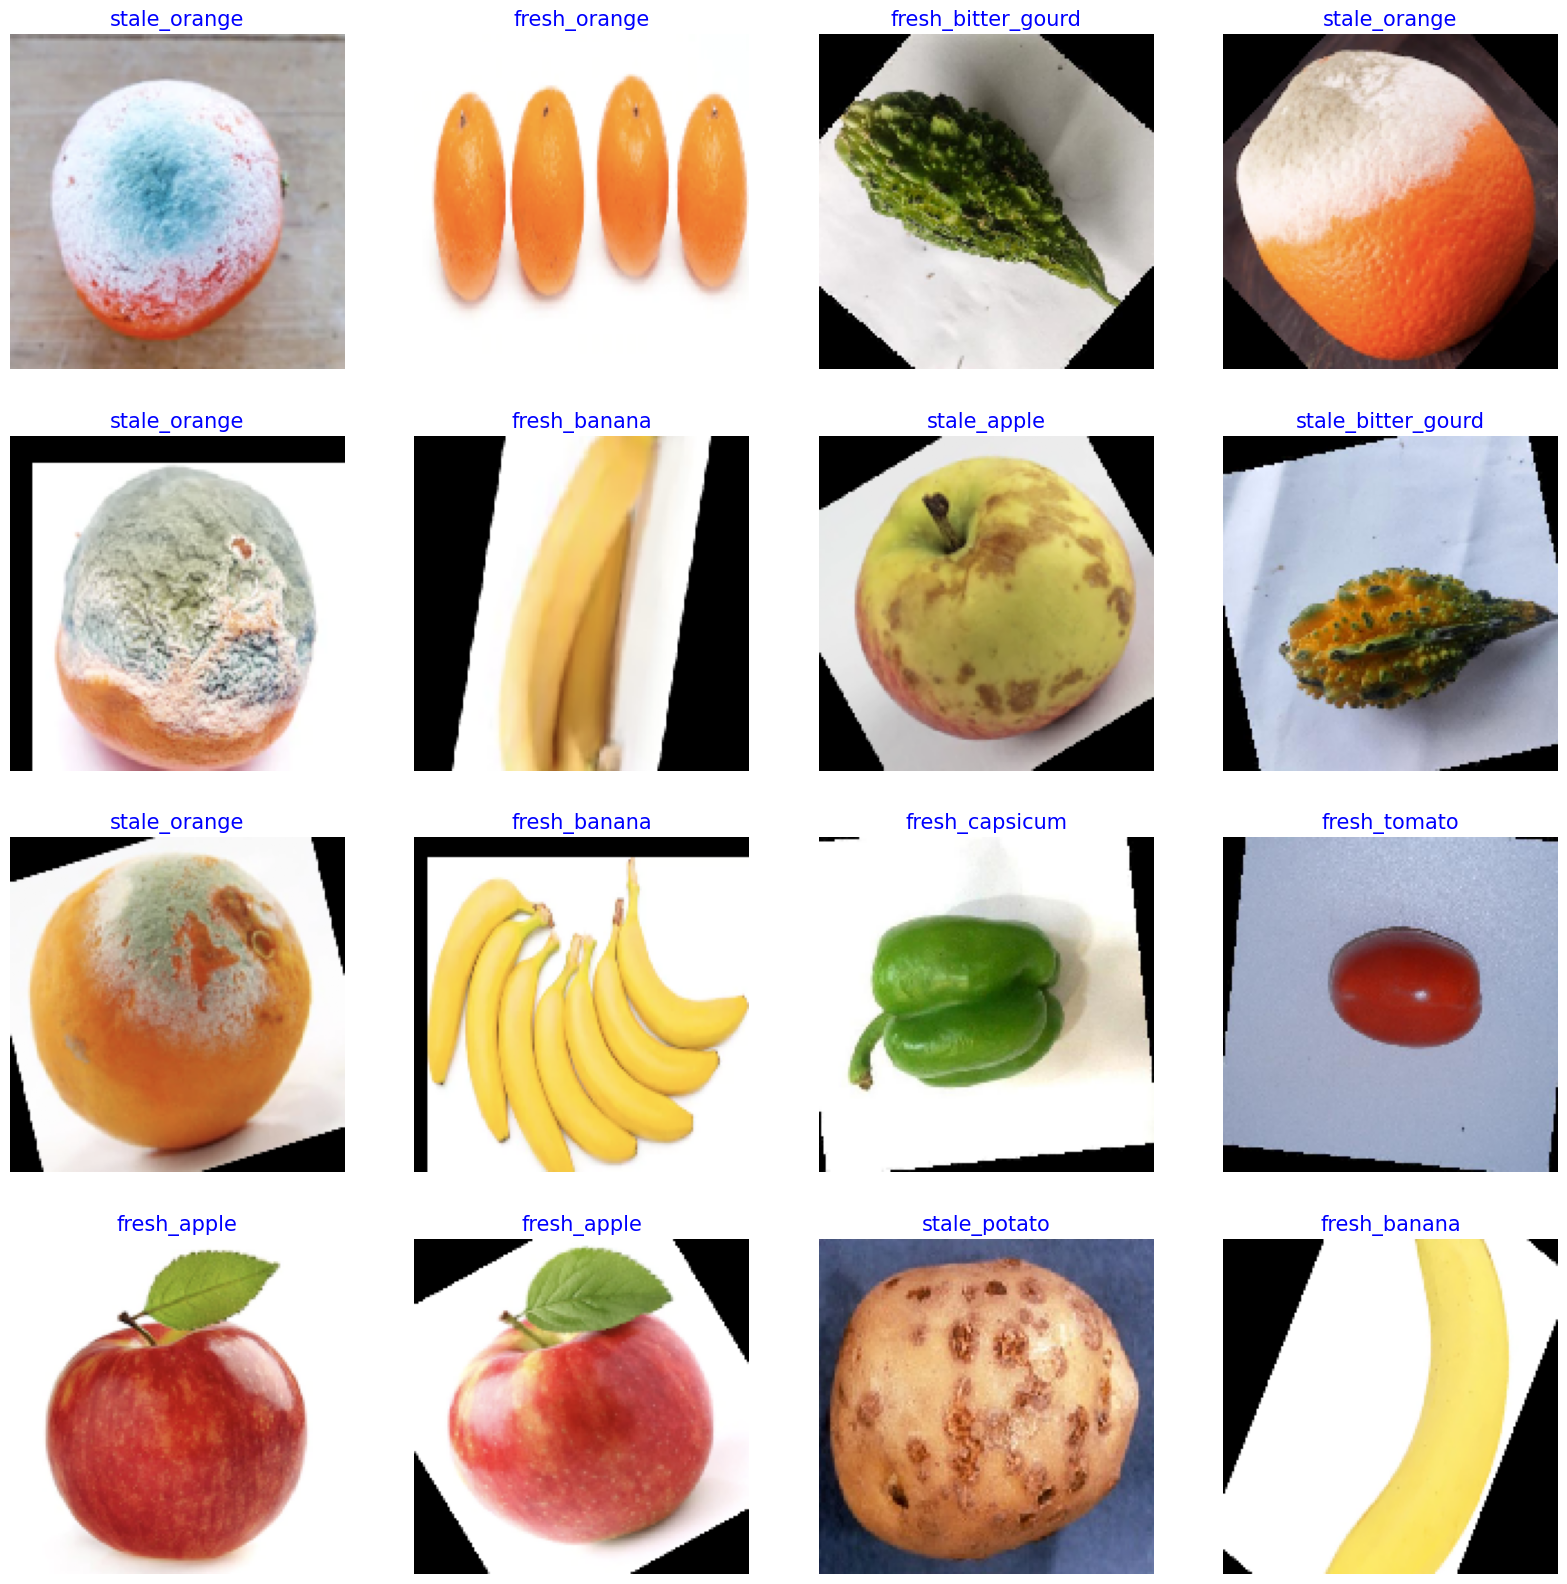

In [ ]:
dict_gen = train_gen.class_indices
classes = list(dict_gen.keys())
images , labels = next(train_gen)

plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4 , i +1)
    image = images[i] / 255
    plt.imshow(image)
    index= np.argmax(labels[i])
    plt.title(classes[index], color= 'blue', fontsize= 15)
    plt.axis('off')
plt.show();

In [ ]:
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Average, Input, Concatenate, GlobalMaxPooling2D,BatchNormalization

In [ ]:
img_shape= (img_size[0] , img_size[1] , channels)
inputs = Input(img_shape)
class_count= len(classes)
base_model1 = tf.keras.applications.efficientnet.EfficientNetB7(include_top= False,input_shape= img_shape)(inputs)
#base_model1.trainable= False

base_model2 = tf.keras.applications.ResNet50(include_top= False,input_shape= img_shape)(inputs)
#base_model2.trainable= False





258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# model= Sequential([
#     concatenated_output,
#     BatchNormalization(axis= -1,momentum=0.99,epsilon=0.001),
#     Dense(256, activation= 'relu'),
#     Dropout(rate= 0.2 , seed= 123),
#     Dense(class_count, activation= 'softmax')
# ])
outputs = Concatenate(axis= -1)([GlobalAveragePooling2D()(base_model1), GlobalAveragePooling2D()(base_model2)])
#concatenated_output.trainable= False
outputs = Dropout(0.4)(outputs)
outputs = BatchNormalization(momentum=0.99,epsilon=0.001)(outputs)
outputs = Dense(256,activation='relu')(outputs)
outputs = Dropout(0.2,seed= 123)(outputs)
#outputs = BatchNormalization()(outputs)
outputs = Dense(class_count, activation='softmax')(outputs)


In [ ]:
from keras.models import Model

In [ ]:
model = Model(inputs, outputs)
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb7      │ (None, 5, 5,      │ 64,097,687 │ input_layer[0][0] │
│ (Functional)        │ 2560)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 5, 5,      │ 23,587,712 │ input_layer[0][0] │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2560)      │          0 │ efficientnetb7[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 4608)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4608)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 4608)      │     18,432 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,179,904 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 20)        │      5,140 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 88,888,875 (339.08 MB)

 Trainable params: 88,515,812 (337.66 MB)

 Non-trainable params: 373,063 (1.42 MB)

In [ ]:


checkpoint_path = "./cp.weights.h5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

num_epochs = 5
history = model.fit(x=train_gen, validation_data=valid_gen, epochs=num_epochs, verbose=1, validation_steps=None,
                    shuffle=False, callbacks=[cp_callback])


Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.6968 - loss: 1.0837 
Epoch 1: saving model to ./cp.weights.h5
132/132 ━━━━━━━━━━━━━━━━━━━━ 4931s 36s/step - accuracy: 0.6977 - loss: 1.0801 - val_accuracy: 0.8337 - val_loss: 0.6362
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 35s/step - accuracy: 0.9650 - loss: 0.1205 
Epoch 2: saving model to ./cp.weights.h5
132/132 ━━━━━━━━━━━━━━━━━━━━ 4837s 37s/step - accuracy: 0.9650 - loss: 0.1205 - val_accuracy: 0.9561 - val_loss: 0.1612
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 35s/step - accuracy: 0.9805 - loss: 0.0603 
Epoch 3: saving model to ./cp.weights.h5
132/132 ━━━━━━━━━━━━━━━━━━━━ 4802s 36s/step - accuracy: 0.9805 - loss: 0.0602 - val_accuracy: 0.9488 - val_loss: 0.2127
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 36s/step - accuracy: 0.9899 - loss: 0.0355 
Epoch 4: saving model to ./cp.weights.h5
132/132 ━━━━━━━━━━━━━━━━━━━━ 4898s 37s/step - accuracy: 0.9900 - loss: 0.0356 - val_accuracy: 0.9611 - val_loss: 0.1714
Epoch 5/5
13

In [ ]:
from IPython.display import FileLink

# Create a link to download the weights file
FileLink('./cp.weights.h5')

/kaggle/working/cp.weights.h5

Model Performance

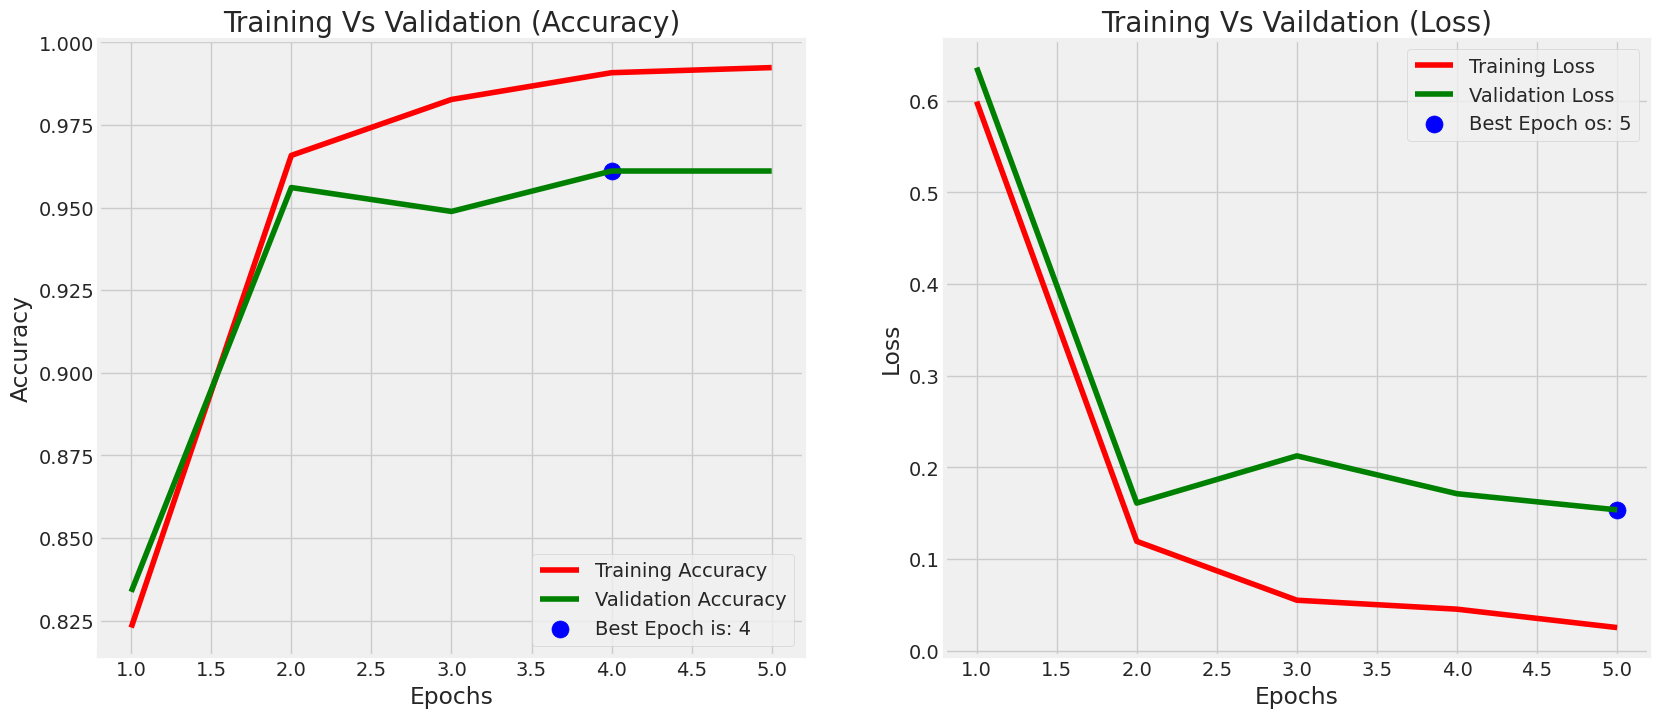

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc= np.argmax(val_acc)

val_lowest= val_loss[index_loss]
val_highest = val_acc[index_acc]

epochs= [i+1 for i in range(len(train_acc))]
acc_label = f"Best Epoch is: {str(index_acc +1)}"
loss_label = f"Best Epoch os: {str(index_loss +1)}"

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(epochs , train_acc , 'r' , label= "Training Accuracy")
plt.plot(epochs , val_acc , 'g' , label= "Validation Accuracy")
plt.scatter(index_acc +1 ,val_highest , s = 150 , c= 'blue', label= acc_label)
plt.title('Training Vs Validation (Accuracy)')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs , train_loss , 'r' , label= "Training Loss")
plt.plot(epochs , val_loss , 'g' , label= "Validation Loss")
plt.scatter(index_loss +1 , val_lowest , s= 150 , c = 'blue' , label= loss_label)
plt.title("Training Vs Vaildation (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout
plt.show();

Model Evaluation

In [ ]:
train_score = model.evaluate(train_gen , steps =64 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 64 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 64 , verbose = 1)

64/64 ━━━━━━━━━━━━━━━━━━━━ 445s 7s/step - accuracy: 0.9991 - loss: 0.0024
64/64 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.9624 - loss: 0.1455
64/64 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step - accuracy: 0.9577 - loss: 0.1498


In [ ]:
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

Train Loss:  0.0028041501063853502
Train Accuracy:  0.998779296875
--------------------
Validation Loss:  0.14452876150608063
Validation Accuracy:  0.9610678553581238
--------------------
Test Loss:  0.1446712762117386
Test Accuracy:  0.9593993425369263


Model Prediction

* Confution Matrix

In [ ]:
#preds = model.predict_generator(test_gen)
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 215s 7s/step


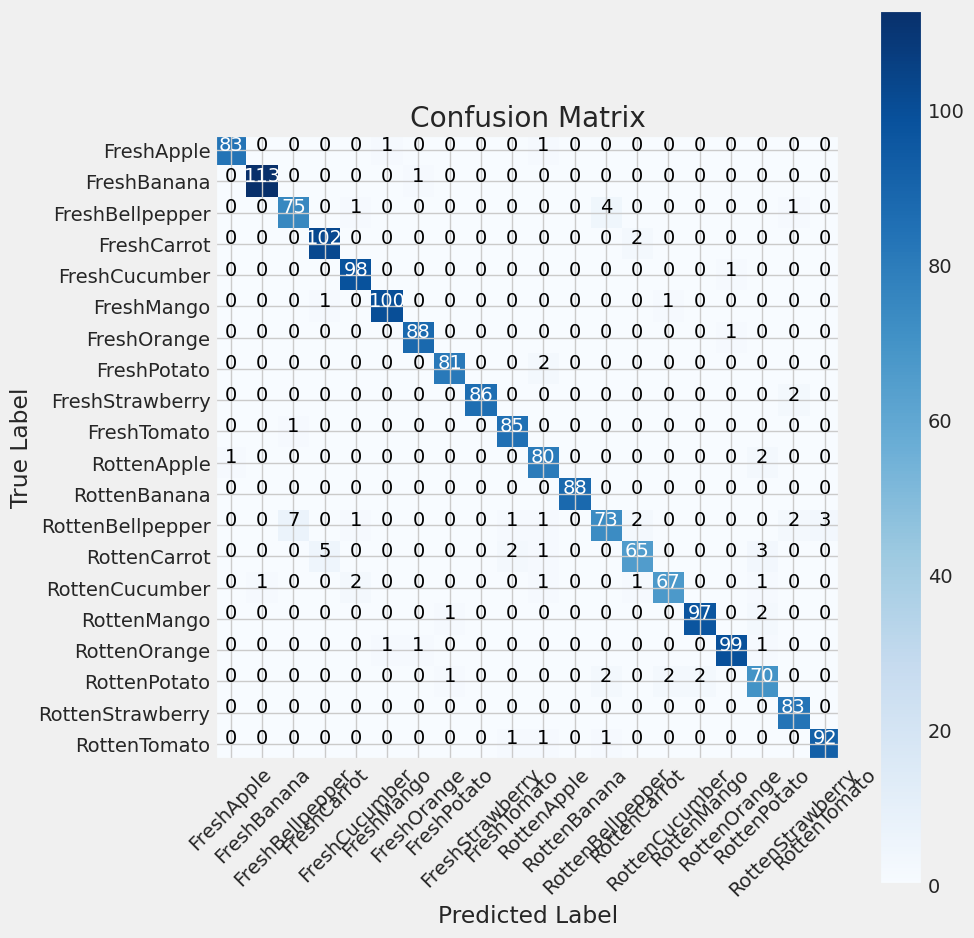

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
#Classification Report
print(classification_report(test_gen.classes, y_pred , target_names= classes,digits=4 ))

                  precision    recall  f1-score   support

      FreshApple     0.9881    0.9765    0.9822        85
     FreshBanana     0.9912    0.9912    0.9912       114
 FreshBellpepper     0.9036    0.9259    0.9146        81
     FreshCarrot     0.9444    0.9808    0.9623       104
   FreshCucumber     0.9608    0.9899    0.9751        99
      FreshMango     0.9804    0.9804    0.9804       102
     FreshOrange     0.9778    0.9888    0.9832        89
     FreshPotato     0.9759    0.9759    0.9759        83
 FreshStrawberry     1.0000    0.9773    0.9885        88
     FreshTomato     0.9551    0.9884    0.9714        86
     RottenApple     0.9195    0.9639    0.9412        83
    RottenBanana     1.0000    1.0000    1.0000        88
RottenBellpepper     0.9125    0.8111    0.8588        90
    RottenCarrot     0.9286    0.8553    0.8904        76
  RottenCucumber     0.9571    0.9178    0.9371        73
     RottenMango     0.9798    0.9700    0.9749       100
    RottenOra

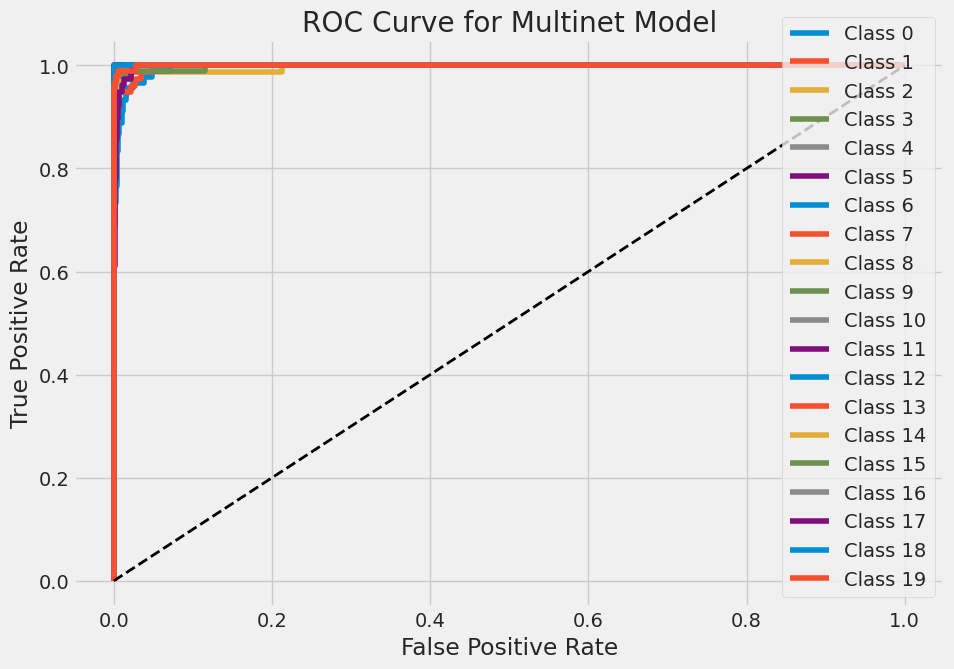

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load your pre-trained model
#model = load_model('your_model.h5')

# Assuming you have test data X_test and corresponding labels y_test
# Make predictions on the test data
#y_pred_prob = model.predict(test_gen)
y_pred_prob = preds

# If you have a multi-class classification problem, convert labels to binary format
# For binary classification, this step may not be necessary
y_test_binary = label_binarize(test_gen.classes, classes=np.unique(test_gen.classes))
n_classes = y_test_binary.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 7))

# Plot micro-average ROC curve
#plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)

# Plot each class's ROC curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
    #plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Plot the random line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinet Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load your trained model (if not loaded already)
# model = load_model('path_to_your_model.h5')

# Save the weights to an h5 file
model.save_weights('./cp.weights.h5')